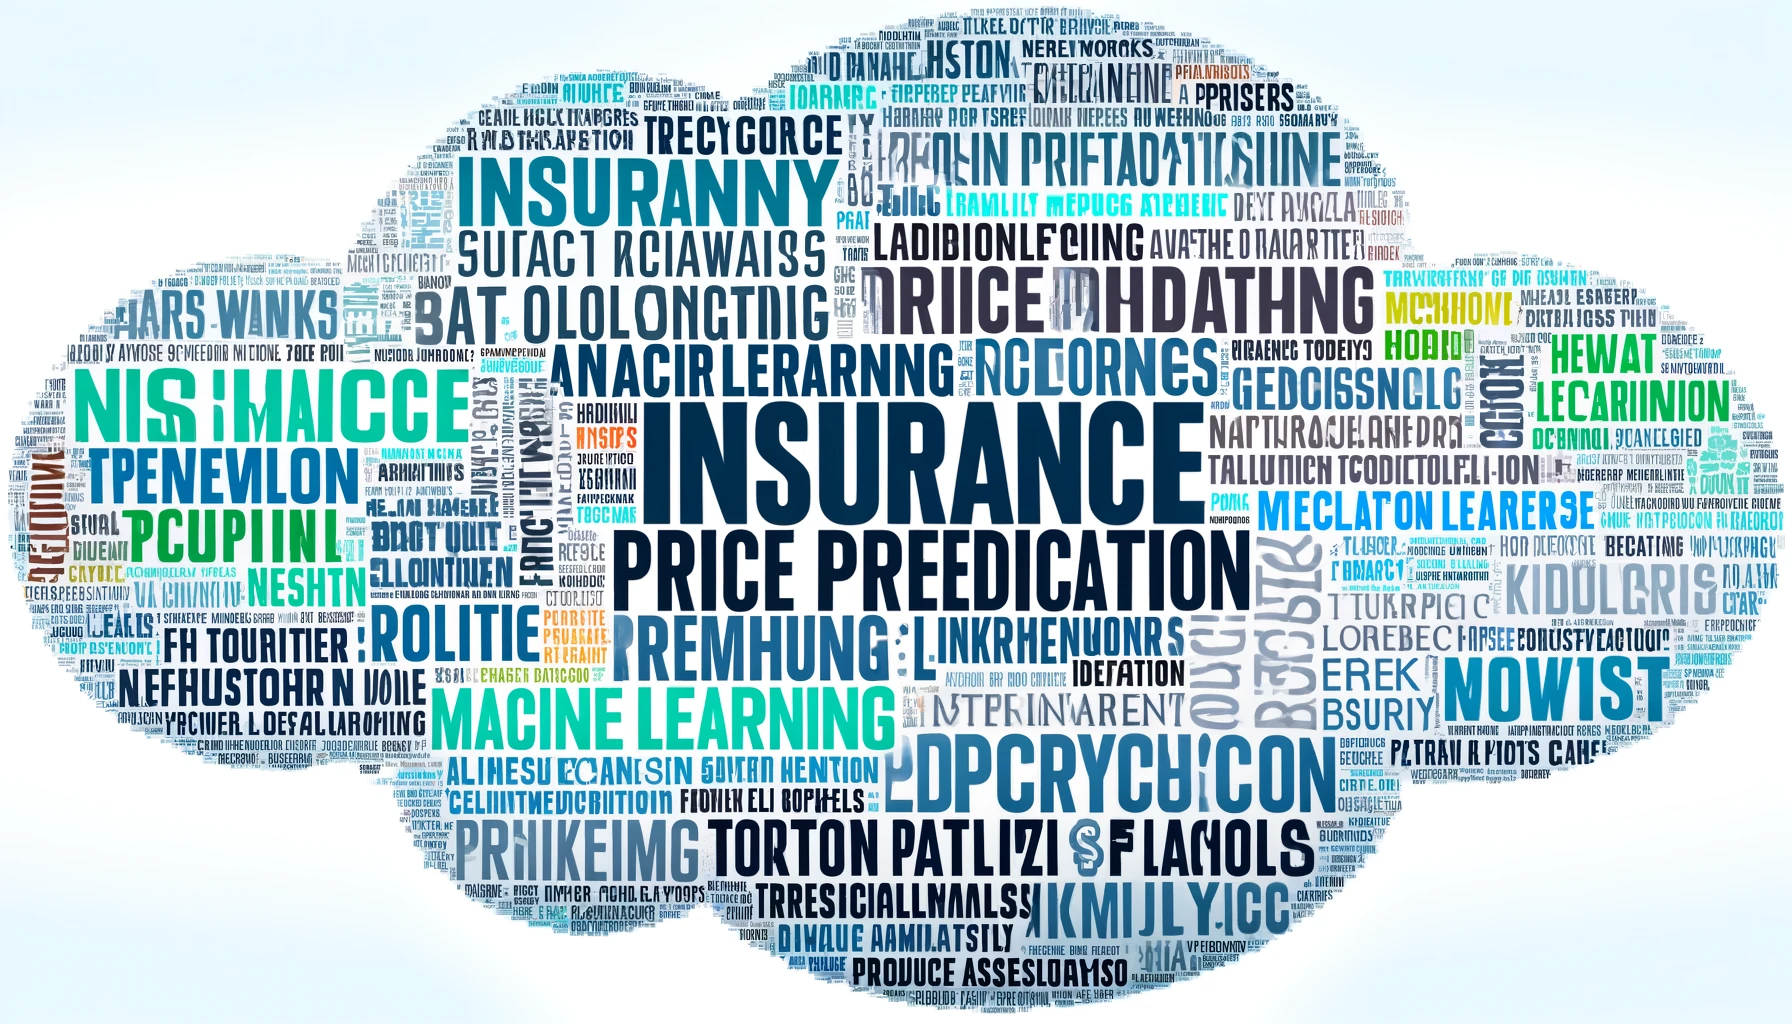

# **Problem Statement**

The objective of this project is to develop a machine learning model that can accurately predict the insurance charges for individuals based on their demographic, health, and lifestyle attributes. Understanding and predicting these charges are crucial for insurance companies to establish fair pricing strategies and manage risk effectively.

# **Business Objectives**

1. **Accurate Pricing**: To predict insurance charges accurately based on relevant customer data, ensuring that pricing reflects the actual risk associated with each policyholder.
2. **Risk Management**: To identify high-risk individuals who may require higher premiums, thereby allowing the company to mitigate potential losses.
3. **Customer Segmentation**: To enable segmentation of customers based on predicted charges, facilitating targeted marketing and personalized insurance plans.
4. **Competitive Advantage**: To provide a data-driven approach to pricing, giving the insurance company a competitive edge in the market by offering fair and competitive premiums.

# **Business Impacts**

1. **Increased Profitability**: By accurately predicting insurance charges, the company can optimize its premium rates, reducing the likelihood of underpricing or overpricing insurance policies, which directly impacts profitability.
2. **Improved Customer Satisfaction**: Fair and transparent pricing based on predictive modeling can improve customer trust and satisfaction, leading to higher retention rates.
3. **Operational Efficiency**: Automating the process of charge prediction reduces the need for manual underwriting, saving time and resources.
4. **Market Competitiveness**: With a robust predictive model, the company can offer competitive pricing, making its insurance products more attractive compared to competitors.

# Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split

# Importing the Dataset

In [2]:
!git clone https://github.com/sdey96/Insurance-Price-Prediction.git

Cloning into 'Insurance-Price-Prediction'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 9 (delta 1), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (9/9), 462.31 KiB | 1.76 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [3]:
data = pd.read_csv("/content/Insurance-Price-Prediction/new_insurance_data (1).csv", sep = ",")

data.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


## Defining the Variables

The dataset contains information on insurance claims and related factors. Here's an overview:

- **Total Entries**: 1,338 rows.
- **Columns (13 total)**:
  1. **age**: Age of the policyholder (some missing values).
  2. **sex**: Gender of the policyholder (`male` or `female`).
  3. **bmi**: Body Mass Index of the policyholder (some missing values).
  4. **children**: Number of children/dependents covered by the insurance (some missing values).
  5. **smoker**: Indicates if the policyholder is a smoker (`yes` or `no`).
  6. **Claim_Amount**: The amount claimed (some missing values).
  7. **past_consultations**: Number of past medical consultations (some missing values).
  8. **num_of_steps**: Number of steps taken (possibly daily or tracked over a period) (some missing values).
  9. **Hospital_expenditure**: Amount spent on hospital care (some missing values).
  10. **NUmber_of_past_hospitalizations**: Number of past hospitalizations (some missing values).
  11. **Anual_Salary**: Annual salary of the policyholder (some missing values).
  12. **region**: Geographic region of the policyholder (`southeast`, etc.).
  13. **charges**: Insurance charges.

The dataset includes both categorical (e.g., sex, smoker, region) and numerical data (e.g., age, bmi, Claim_Amount).

## Basic Checks

In [4]:
data.shape

(1338, 13)

In [5]:
data.dtypes

,0
age,float64
sex,object
bmi,float64
children,float64
smoker,object
Claim_Amount,float64
past_consultations,float64
num_of_steps,float64
Hospital_expenditure,float64
NUmber_of_past_hospitalizations,float64


In [6]:
data.nunique()

,0
age,47
sex,2
bmi,547
children,6
smoker,2
Claim_Amount,1324
past_consultations,39
num_of_steps,1335
Hospital_expenditure,1334
NUmber_of_past_hospitalizations,4


In [7]:
print(data['sex'].unique())
print(data['children'].unique())
print(data['smoker'].unique())
print(data['region'].unique())
print(data['NUmber_of_past_hospitalizations'].unique())

['male' 'female']
[ 0.  1.  2.  3.  4.  5. nan]
['no' 'yes']
['southeast' 'southwest' 'northwest' 'northeast']
[ 0. nan  1.  2.  3.]


In [8]:
data.describe()

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,charges
count,1329.000000,1335.000000,1333.000000,1324.000000,1332.000000,1.335000e+03,1.334000e+03,1336.000000,1.332000e+03,1338.000000
mean,39.310008,30.665112,1.090773,33361.327180,15.216216,9.100047e+05,1.584179e+07,1.060629,3.696849e+08,13270.422265
std,14.034818,6.101690,1.201856,15617.288337,7.467723,9.188612e+04,2.669305e+07,0.533583,5.668843e+08,12110.011237
min,18.000000,15.960000,0.000000,1920.136268,1.000000,6.954300e+05,2.945253e+04,0.000000,2.747072e+06,1121.873900
25%,27.000000,26.302500,0.000000,20768.860390,9.000000,8.471995e+05,4.077633e+06,1.000000,7.701932e+07,4740.287150
50%,39.000000,30.400000,1.000000,33700.310675,15.000000,9.143000e+05,7.490337e+06,1.000000,1.419361e+08,9382.033000
75%,51.000000,34.687500,2.000000,45052.331957,20.000000,9.716840e+05,1.084082e+07,1.000000,3.243499e+08,16639.912515
max,64.000000,53.130000,5.000000,77277.988480,40.000000,1.107872e+06,2.616317e+08,3.000000,4.117197e+09,63770.428010


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [10]:
data.isnull().sum().sort_values(ascending = False)

,0
Claim_Amount,14
age,9
past_consultations,6
Anual_Salary,6
children,5
Hospital_expenditure,4
bmi,3
num_of_steps,3
NUmber_of_past_hospitalizations,2
sex,0


# Data Preprocessing

## Checking Null Values

In [11]:
data.isnull().sum().sort_values(ascending = False)

,0
Claim_Amount,14
age,9
past_consultations,6
Anual_Salary,6
children,5
Hospital_expenditure,4
bmi,3
num_of_steps,3
NUmber_of_past_hospitalizations,2
sex,0


In [12]:
data[data.isnull().any(axis=1)]

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
5,18.0,male,34.430,0.0,no,26488.339120,20.0,717162.0,3.696161e+06,0.0,NaN,southeast,1137.46970
8,18.0,male,43.010,0.0,no,9715.650411,17.0,NaN,9.216440e+06,0.0,5.888197e+07,southeast,1149.39590
11,19.0,male,20.300,0.0,no,1920.136268,NaN,695430.0,3.786542e+06,0.0,2.747072e+06,southwest,1242.26000
12,19.0,male,20.700,0.0,no,3927.892067,4.0,723928.0,5.013945e+06,NaN,9.462889e+07,southwest,1242.81600
13,19.0,male,27.600,0.0,no,46780.546480,8.0,701227.0,NaN,0.0,3.842163e+07,southwest,1252.40700
15,19.0,male,NaN,0.0,no,12515.953700,15.0,726642.0,2.716158e+06,0.0,4.354445e+07,southwest,1256.29900
16,NaN,male,34.100,0.0,no,14682.871510,3.0,718891.0,1.992862e+06,0.0,2.396534e+07,southwest,1261.44200
19,20.0,male,33.330,0.0,no,12590.767620,14.0,729642.0,7.647247e+06,0.0,NaN,southeast,1391.52870
35,NaN,male,25.175,0.0,no,47840.825560,17.0,727198.0,3.779651e+06,0.0,4.964638e+07,northwest,1632.03625
46,NaN,male,39.500,0.0,no,33218.346350,10.0,752311.0,8.767307e+06,0.0,4.038872e+06,southwest,1682.59700


In [13]:
data.columns[data.isnull().any()]

Index(['age', 'bmi', 'children', 'Claim_Amount', 'past_consultations',
       'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary'],
      dtype='object')

### Removing Null Values from the `age` Column

In [14]:
data['age'] = data['age'].fillna(int(data['age'].mean()))

In [15]:
print(data.shape)
print(data.isnull().sum().sort_values(ascending = False))

(1338, 13)
Claim_Amount                       14
past_consultations                  6
Anual_Salary                        6
children                            5
Hospital_expenditure                4
bmi                                 3
num_of_steps                        3
NUmber_of_past_hospitalizations     2
age                                 0
sex                                 0
smoker                              0
region                              0
charges                             0
dtype: int64


### Removing Null Values from the `bmi` Column

In [16]:
data['bmi'] = data['bmi'].fillna(round(data['bmi'].mean(),3))

In [17]:
print(data.shape)
print(data.isnull().sum().sort_values(ascending = False))

(1338, 13)
Claim_Amount                       14
past_consultations                  6
Anual_Salary                        6
children                            5
Hospital_expenditure                4
num_of_steps                        3
NUmber_of_past_hospitalizations     2
age                                 0
sex                                 0
bmi                                 0
smoker                              0
region                              0
charges                             0
dtype: int64


### Removing Null Values from the `children` Column

In [18]:
data['children'] = data['children'].fillna(data['children'].mode()[0])

In [19]:
print(data.shape)
print(data.isnull().sum().sort_values(ascending = False))

(1338, 13)
Claim_Amount                       14
past_consultations                  6
Anual_Salary                        6
Hospital_expenditure                4
num_of_steps                        3
NUmber_of_past_hospitalizations     2
age                                 0
sex                                 0
bmi                                 0
children                            0
smoker                              0
region                              0
charges                             0
dtype: int64


In [20]:
data[data.isnull().any(axis=1)]

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
5,18.0,male,34.430,0.0,no,26488.339120,20.0,717162.0,3.696161e+06,0.0,NaN,southeast,1137.46970
8,18.0,male,43.010,0.0,no,9715.650411,17.0,NaN,9.216440e+06,0.0,5.888197e+07,southeast,1149.39590
11,19.0,male,20.300,0.0,no,1920.136268,NaN,695430.0,3.786542e+06,0.0,2.747072e+06,southwest,1242.26000
12,19.0,male,20.700,0.0,no,3927.892067,4.0,723928.0,5.013945e+06,NaN,9.462889e+07,southwest,1242.81600
13,19.0,male,27.600,0.0,no,46780.546480,8.0,701227.0,NaN,0.0,3.842163e+07,southwest,1252.40700
19,20.0,male,33.330,0.0,no,12590.767620,14.0,729642.0,7.647247e+06,0.0,NaN,southeast,1391.52870
131,18.0,male,26.180,2.0,no,34873.325140,4.0,NaN,2.900342e+06,0.0,2.227997e+07,southeast,2304.00220
270,30.0,male,24.130,1.0,no,26662.589730,13.0,832812.0,NaN,1.0,2.135030e+07,northwest,4032.24070
284,30.0,male,27.645,1.0,no,8143.064214,17.0,NaN,2.890746e+06,1.0,3.361309e+07,northeast,4237.12655
327,32.0,male,35.200,2.0,no,32422.209200,NaN,831264.0,2.806910e+06,1.0,3.917699e+07,southwest,4670.64000


### Removing the Null Values from the `Claim_Amount` Column

In [21]:
data['Claim_Amount'] = data['Claim_Amount'].fillna(data['Claim_Amount'].mean())

In [22]:
print(data.shape)
print(data.isnull().sum().sort_values(ascending = False))

(1338, 13)
past_consultations                 6
Anual_Salary                       6
Hospital_expenditure               4
num_of_steps                       3
NUmber_of_past_hospitalizations    2
age                                0
sex                                0
bmi                                0
children                           0
smoker                             0
Claim_Amount                       0
region                             0
charges                            0
dtype: int64


### Removing the Null Values from the `past_consultations` Column

In [23]:
data['past_consultations'] = data['past_consultations'].fillna(round(data['past_consultations'].mean()))

In [24]:
print(data.shape)
print(data.isnull().sum().sort_values(ascending = False))

(1338, 13)
Anual_Salary                       6
Hospital_expenditure               4
num_of_steps                       3
NUmber_of_past_hospitalizations    2
age                                0
sex                                0
bmi                                0
children                           0
smoker                             0
Claim_Amount                       0
past_consultations                 0
region                             0
charges                            0
dtype: int64


### Removing the Null Values from the `num_of_steps` Column

In [25]:
data['num_of_steps'] = data['num_of_steps'].fillna(round(data['num_of_steps'].mean()))

In [26]:
print(data.shape)
print(data.isnull().sum().sort_values(ascending = False))

(1338, 13)
Anual_Salary                       6
Hospital_expenditure               4
NUmber_of_past_hospitalizations    2
age                                0
sex                                0
bmi                                0
children                           0
smoker                             0
Claim_Amount                       0
past_consultations                 0
num_of_steps                       0
region                             0
charges                            0
dtype: int64


### Removing the Null Values from the `Annual_Salary` Column

In [27]:
data['Anual_Salary'] = data['Anual_Salary'].fillna(data['Anual_Salary'].mean())

In [28]:
print(data.shape)
print(data.isnull().sum().sort_values(ascending = False))

(1338, 13)
Hospital_expenditure               4
NUmber_of_past_hospitalizations    2
age                                0
sex                                0
bmi                                0
children                           0
smoker                             0
Claim_Amount                       0
past_consultations                 0
num_of_steps                       0
Anual_Salary                       0
region                             0
charges                            0
dtype: int64


### Removing the Null Values from the `Hospital_expenditure` Column

In [29]:
data['Hospital_expenditure'] = data['Hospital_expenditure'].fillna(data['Hospital_expenditure'].mean())

In [30]:
print(data.shape)
print(data.isnull().sum().sort_values(ascending = False))

(1338, 13)
NUmber_of_past_hospitalizations    2
age                                0
sex                                0
bmi                                0
children                           0
smoker                             0
Claim_Amount                       0
past_consultations                 0
num_of_steps                       0
Hospital_expenditure               0
Anual_Salary                       0
region                             0
charges                            0
dtype: int64


### Removing the Null Values from the `Number_of_past_hospitalizations` Column

In [31]:
data['NUmber_of_past_hospitalizations'] = data['NUmber_of_past_hospitalizations'].fillna(data['NUmber_of_past_hospitalizations'].mode()[0])

In [32]:
data.rename(columns={'NUmber_of_past_hospitalizations': 'Number_of_past_hospitalizations'}, inplace=True)

In [33]:
print(data.shape)
print(data.isnull().sum().sort_values(ascending = False))

(1338, 13)
age                                0
sex                                0
bmi                                0
children                           0
smoker                             0
Claim_Amount                       0
past_consultations                 0
num_of_steps                       0
Hospital_expenditure               0
Number_of_past_hospitalizations    0
Anual_Salary                       0
region                             0
charges                            0
dtype: int64


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1338 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1338 non-null   float64
 3   children                         1338 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1338 non-null   float64
 6   past_consultations               1338 non-null   float64
 7   num_of_steps                     1338 non-null   float64
 8   Hospital_expenditure             1338 non-null   float64
 9   Number_of_past_hospitalizations  1338 non-null   float64
 10  Anual_Salary                     1338 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

## Checking Outliers

In [35]:
col_name = list(data.columns)
col_name

['age',
 'sex',
 'bmi',
 'children',
 'smoker',
 'Claim_Amount',
 'past_consultations',
 'num_of_steps',
 'Hospital_expenditure',
 'Number_of_past_hospitalizations',
 'Anual_Salary',
 'region',
 'charges']

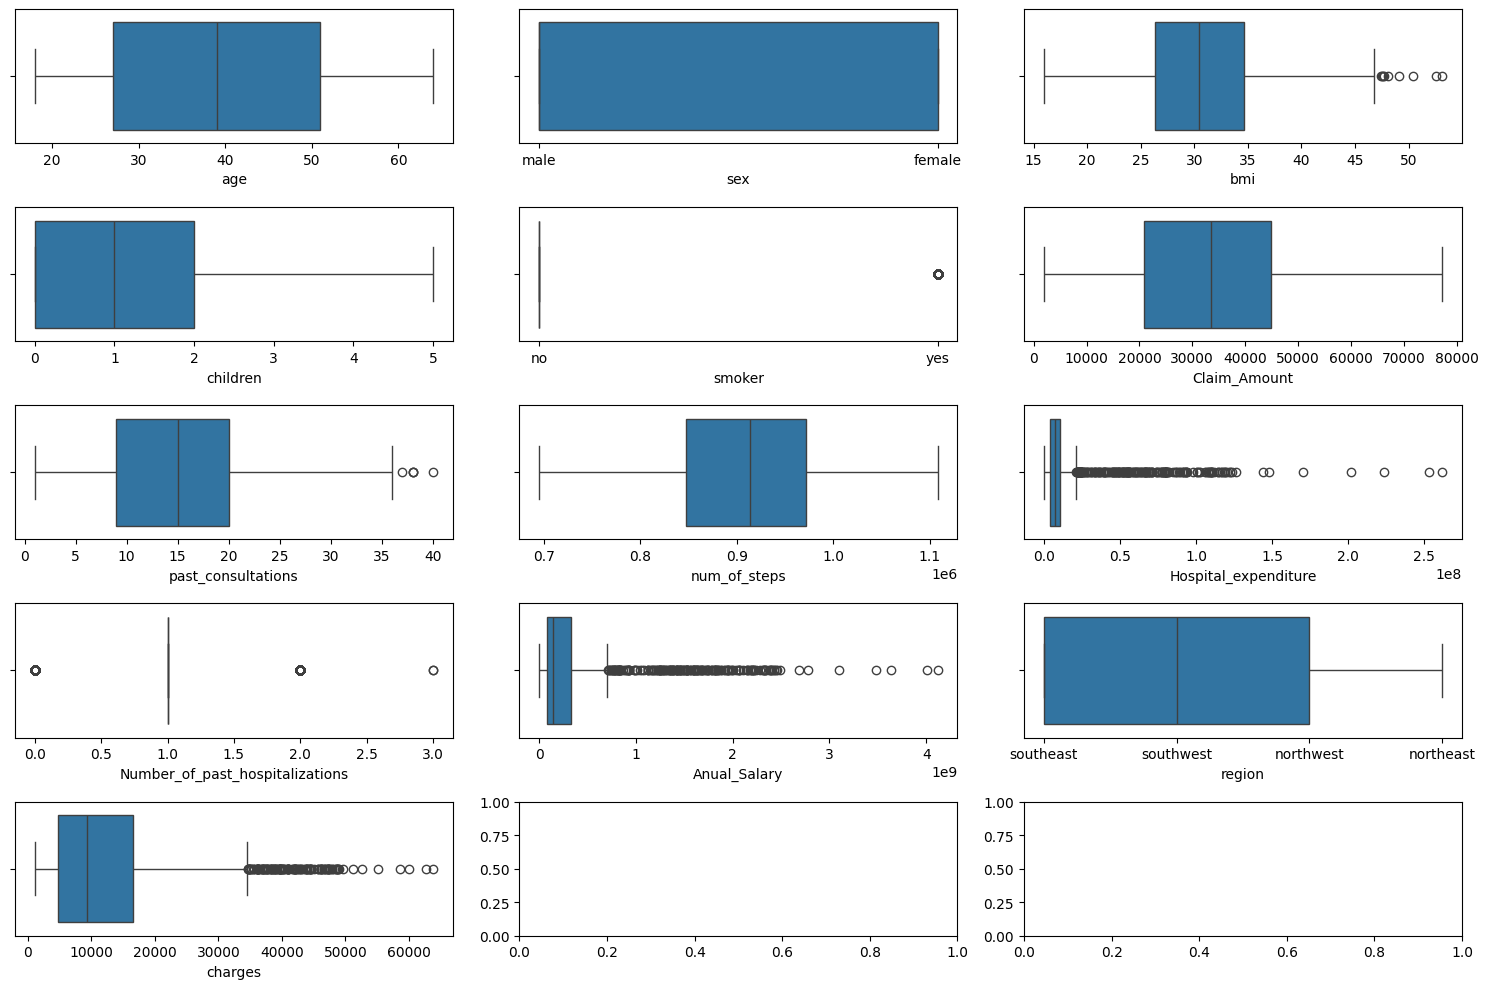

In [36]:
fig, axes = plt.subplots(nrows = 5, ncols = 3, figsize = (15, 10))
axes = axes.flatten()

for i, column in enumerate(col_name):
  sns.boxplot(x = data[column], ax = axes[i])

plt.tight_layout()
plt.show()

This series of boxplots for different variables in the insurance dataset, providing a visual summary of the distribution, central tendency, and variability of the data, as well as highlighting any potential outliers. Here’s a breakdown of each plot:

1. **Age**: The age distribution is roughly symmetrical, with a median around 40 years. The range extends from about 18 to 64 years, with no significant outliers.

2. **Sex**: This is likely a categorical distribution showing counts rather than a boxplot. It indicates the dataset contains both males and females, likely with similar representation.

3. **BMI (Body Mass Index)**: BMI values range from around 15 to 50. The median is approximately 30, suggesting the majority of policyholders are in the overweight category. There are a few high outliers above 45.

4. **Children**: The number of children ranges from 0 to 5, with most people having between 0 and 2 children. No extreme outliers are observed.

5. **Smoker**: This plot shows two categories (`yes` or `no`). The majority of individuals are non-smokers, with smokers being a minority, potentially highlighted as outliers.

6. **Claim_Amount**: Claim amounts range widely, with most claims under 40,000. Some claims are much higher, reaching close to 80,000, marked as outliers.

7. **Past_consultations**: The number of past consultations is mostly between 0 and 20, with a few people having a higher number of consultations, reaching around 40.

8. **Num_of_steps**: This plot indicates the number of steps, likely on a daily or average basis. Most values are clustered around 700,000 to 1,000,000, with a few outliers.

9. **Hospital_expenditure**: The hospital expenditure has a broad range, with most values under 100,000, but there are significant outliers, going up to 250,000 or more, indicating high medical costs for some.

10. **Number_of_past_hospitalizations**: Most people have few hospitalizations (0 or 1), with a few having up to 3, showing as outliers.

11. **Annual_Salary**: Salaries show a wide range, with the majority under 1,000,000 but some outliers reaching up to 4,000,000, indicating a large disparity in income.

12. **Region**: This categorical variable shows the distribution of policyholders across four regions (`southeast`, `southwest`, `northwest`, `northeast`), with no apparent skew or outliers.

13. **Charges**: Insurance charges are mostly below 15,000, with some outliers reaching up to 60,000, highlighting individuals with higher associated costs.

Overall, these boxplots provide insights into the distribution and spread of various factors, highlighting key patterns like the prevalence of non-smokers, common BMI ranges, hospital expenditure, and insurance charges. The outliers indicate cases of extreme values, which could be investigated further for deeper insights.

### Treatment of Outliers through IQR Method

In [37]:
data.dtypes

,0
age,float64
sex,object
bmi,float64
children,float64
smoker,object
Claim_Amount,float64
past_consultations,float64
num_of_steps,float64
Hospital_expenditure,float64
Number_of_past_hospitalizations,float64


In [38]:
numeric_col = data.select_dtypes(include=['number']).drop(columns=['Number_of_past_hospitalizations'])
numeric_col.head()

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,Anual_Salary,charges
0,18.0,23.21,0.0,29087.54313,17.0,715428.0,4720920.992,55784970.05,1121.8739
1,18.0,30.14,0.0,39053.67437,7.0,699157.0,4329831.676,13700885.19,1131.5066
2,18.0,33.33,0.0,39023.62759,19.0,702341.0,6884860.774,73523107.27,1135.9407
3,18.0,33.66,0.0,28185.39332,11.0,700250.0,4274773.550,75819679.60,1136.3994
4,18.0,34.10,0.0,14697.85941,16.0,711584.0,3787293.921,23012320.01,1137.0110


In [39]:
Q1 = numeric_col.quantile(0.25)
Q3 = numeric_col.quantile(0.75)

IQR = Q3 - Q1

print(IQR)

age                     2.400000e+01
bmi                     8.341250e+00
children                2.000000e+00
Claim_Amount            2.403123e+04
past_consultations      1.100000e+01
num_of_steps            1.240202e+05
Hospital_expenditure    6.816929e+06
Anual_Salary            2.523204e+08
charges                 1.189963e+04
dtype: float64


In [40]:
lower_bound = numeric_col.quantile(0.25) - 1.5 * IQR
upper_bound = numeric_col.quantile(0.75) + 1.5 * IQR

In [41]:
data_no_outliers = numeric_col[~((numeric_col < lower_bound) | (numeric_col > upper_bound)).any(axis=1)]
data_no_outliers.head()

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,Anual_Salary,charges
0,18.0,23.21,0.0,29087.54313,17.0,715428.0,4720920.992,55784970.05,1121.8739
1,18.0,30.14,0.0,39053.67437,7.0,699157.0,4329831.676,13700885.19,1131.5066
2,18.0,33.33,0.0,39023.62759,19.0,702341.0,6884860.774,73523107.27,1135.9407
3,18.0,33.66,0.0,28185.39332,11.0,700250.0,4274773.550,75819679.60,1136.3994
4,18.0,34.10,0.0,14697.85941,16.0,711584.0,3787293.921,23012320.01,1137.0110


In [42]:
data_no_outliers.shape

(1126, 9)

In [43]:
data_no_outliers.isnull().sum().sort_values(ascending = False)

,0
age,0
bmi,0
children,0
Claim_Amount,0
past_consultations,0
num_of_steps,0
Hospital_expenditure,0
Anual_Salary,0
charges,0


In [44]:
data = pd.concat([data_no_outliers, data[['sex', 'smoker', 'region', 'Number_of_past_hospitalizations']]], axis=1)

In [45]:
data.head()

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,Anual_Salary,charges,sex,smoker,region,Number_of_past_hospitalizations
0,18.0,23.21,0.0,29087.54313,17.0,715428.0,4720920.992,55784970.05,1121.8739,male,no,southeast,0.0
1,18.0,30.14,0.0,39053.67437,7.0,699157.0,4329831.676,13700885.19,1131.5066,male,no,southeast,0.0
2,18.0,33.33,0.0,39023.62759,19.0,702341.0,6884860.774,73523107.27,1135.9407,male,no,southeast,0.0
3,18.0,33.66,0.0,28185.39332,11.0,700250.0,4274773.550,75819679.60,1136.3994,male,no,southeast,0.0
4,18.0,34.10,0.0,14697.85941,16.0,711584.0,3787293.921,23012320.01,1137.0110,male,no,southeast,0.0


In [46]:
data.isnull().sum().sort_values(ascending = False)

,0
age,212
bmi,212
children,212
Claim_Amount,212
past_consultations,212
num_of_steps,212
Hospital_expenditure,212
Anual_Salary,212
charges,212
sex,0


In [47]:
data.dropna(inplace=True)

In [48]:
data.shape

(1126, 13)

# Feature Engineering

## Numeric Columns

In [49]:
numeric_data = data.select_dtypes(include=['number'])

### Correlation Matrix

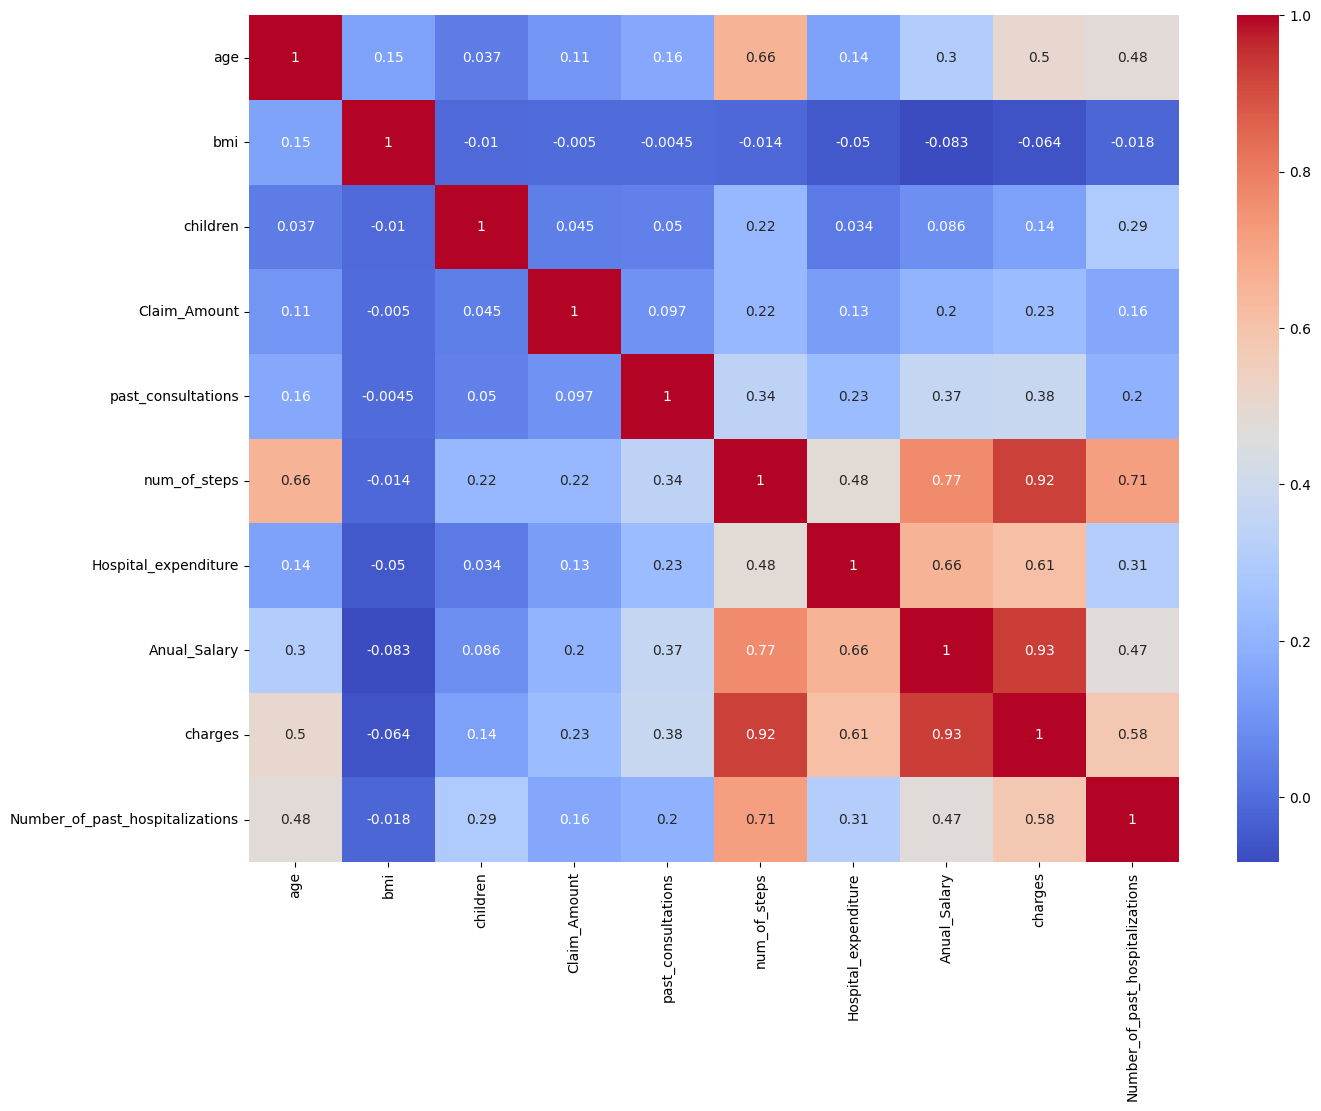

In [50]:
plt.figure(figsize = (15,11))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.show()

### Variation Inflation Factor (VIF)

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

x = numeric_data

vif_data = pd.DataFrame()

vif_data["feature"] = x.columns

vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif_data

,feature,VIF
0,age,18.647015
1,bmi,28.158271
2,children,2.041448
3,Claim_Amount,5.930926
4,past_consultations,6.716169
5,num_of_steps,60.941074
6,Hospital_expenditure,6.733394
7,Anual_Salary,25.430893
8,charges,45.192814
9,Number_of_past_hospitalizations,12.235470


In [52]:
# Highest VIF: 60.94, so drop this column

numeric_columns = numeric_data.drop(["num_of_steps"], axis = 1)

In [53]:
x = numeric_columns

vif_data = pd.DataFrame()

vif_data["feature"] = x.columns

vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif_data

,feature,VIF
0,age,17.498113
1,bmi,13.426627
2,children,2.021241
3,Claim_Amount,5.503492
4,past_consultations,6.267850
5,Hospital_expenditure,6.485844
6,Anual_Salary,25.386873
7,charges,44.918322
8,Number_of_past_hospitalizations,11.386938


In [54]:
# Highest VIF: 44.92, so drop this column

numeric_columns = numeric_columns.drop(["charges"], axis = 1)

In [55]:
x = numeric_columns

vif_data = pd.DataFrame()

vif_data["feature"] = x.columns

vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif_data

,feature,VIF
0,age,12.077326
1,bmi,12.354700
2,children,1.993284
3,Claim_Amount,5.477937
4,past_consultations,6.250576
5,Hospital_expenditure,6.468813
6,Anual_Salary,5.288531
7,Number_of_past_hospitalizations,11.009927


In [56]:
# Highest VIF: 12.35, so drop this column

numeric_columns = numeric_columns.drop(["bmi"], axis = 1)

In [57]:
x = numeric_columns

vif_data = pd.DataFrame()

vif_data["feature"] = x.columns

vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif_data

,feature,VIF
0,age,9.504427
1,children,1.978257
2,Claim_Amount,4.940706
3,past_consultations,5.624491
4,Hospital_expenditure,6.015223
5,Anual_Salary,4.708461
6,Number_of_past_hospitalizations,10.903649


In [58]:
# Highest VIF: 10.90, so drop this column

numeric_columns = numeric_columns.drop(["Number_of_past_hospitalizations"], axis = 1)

In [59]:
x = numeric_columns

vif_data = pd.DataFrame()

vif_data["feature"] = x.columns

vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif_data

,feature,VIF
0,age,6.474797
1,children,1.753334
2,Claim_Amount,4.844903
3,past_consultations,5.589438
4,Hospital_expenditure,5.939800
5,Anual_Salary,4.488043


In [60]:
feature = list(vif_data.feature)
feature

['age',
 'children',
 'Claim_Amount',
 'past_consultations',
 'Hospital_expenditure',
 'Anual_Salary']

In [61]:
# Fetching all the values of independent columns

input = numeric_columns[feature]
input

,age,children,Claim_Amount,past_consultations,Hospital_expenditure,Anual_Salary
0,18.0,0.0,29087.54313,17.0,4.720921e+06,5.578497e+07
1,18.0,0.0,39053.67437,7.0,4.329832e+06,1.370089e+07
2,18.0,0.0,39023.62759,19.0,6.884861e+06,7.352311e+07
3,18.0,0.0,28185.39332,11.0,4.274774e+06,7.581968e+07
4,18.0,0.0,14697.85941,16.0,3.787294e+06,2.301232e+07
...,...,...,...,...,...,...
1132,26.0,4.0,47575.32907,23.0,1.899911e+07,6.848551e+08
1133,52.0,3.0,40405.58219,22.0,1.695495e+07,6.549545e+08
1135,35.0,2.0,56705.00053,19.0,1.820541e+07,6.646015e+08
1139,50.0,2.0,18311.54568,29.0,1.691774e+07,7.070238e+08


In [62]:
# Fetching the values dependent column
target = data["charges"]
target

,charges
0,1121.87390
1,1131.50660
2,1135.94070
3,1136.39940
4,1137.01100
...,...
1132,24671.66334
1133,24869.83680
1135,24915.04626
1139,25333.33284


## Categorical Columns

In [63]:
cat_cols = data.select_dtypes(exclude=['number'])
cat_cols

,sex,smoker,region
0,male,no,southeast
1,male,no,southeast
2,male,no,southeast
3,male,no,southeast
4,male,no,southeast
...,...,...,...
1132,female,no,northeast
1133,male,yes,northeast
1135,female,no,northeast
1139,male,no,northeast


### Calculating Cramer's V

In [64]:
from scipy.stats import chi2_contingency

# Define a function to calculate Cramer's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()

    phi2 = chi2 / n

    r, k = confusion_matrix.shape

    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))

    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)

    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [65]:
# Create contingency tables
sex_smoker = pd.crosstab(data['sex'], data['smoker'])
sex_region = pd.crosstab(data['sex'], data['region'])
smoker_region = pd.crosstab(data['smoker'], data['region'])

In [66]:
# Calculate Cramer's V for each pair
cv_sex_smoker = cramers_v(sex_smoker)
cv_sex_region = cramers_v(sex_region)
cv_smoker_region = cramers_v(smoker_region)

In [67]:
sex_smoker, sex_region, smoker_region

(smoker   no  yes
 sex             
 female  528   50
 male    496   52,
 region  northeast  northwest  southeast  southwest
 sex                                               
 female        144        143        146        145
 male          134        140        138        136,
 region  northeast  northwest  southeast  southwest
 smoker                                            
 no            248        257        258        261
 yes            30         26         26         20)

In [68]:
cv_sex_smoker, cv_sex_region, cv_smoker_region

(0.0, 0.0, 0.0)

### Association Matrix

In [69]:
# Function to calculate Cramer's V for all pairs of categorical columns
def calculate_cramers_v_matrix(data, columns):
    cramers_v_matrix = pd.DataFrame(index=columns, columns=columns, dtype=float)
    for col1 in columns:
        for col2 in columns:
            if col1 != col2:
                contingency_table = pd.crosstab(data[col1], data[col2])
                cramers_v_matrix.loc[col1, col2] = cramers_v(contingency_table)
            else:
                cramers_v_matrix.loc[col1, col2] = 1.0
    return cramers_v_matrix

In [70]:
# Calculate Cramer's V matrix for the selected categorical variables
categorical_columns = ['sex', 'smoker', 'region']
cramers_v_matrix = calculate_cramers_v_matrix(data, categorical_columns)

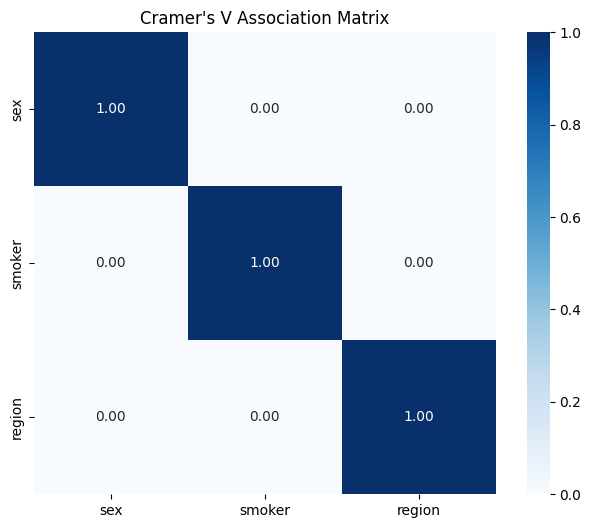

In [71]:
# Visualize the association matrix with annotations
plt.figure(figsize=(8, 6))
sns.heatmap(cramers_v_matrix, annot=True, cmap='Blues', cbar=True, square=True, fmt=".2f")
plt.title("Cramer's V Association Matrix")
plt.show()

The plot represents a Cramer's V association matrix, which is used to measure the strength of association between pairs of categorical variables. In this particular plot, the association between the categorical variables `sex`, `smoker`, and `region` is being analyzed.

***Interpretation of the Plot***

1. **Diagonal Values (1.00)**:
   - The values along the diagonal (`sex` vs. `sex`, `smoker` vs. `smoker`, `region` vs. `region`) are all 1.00. This is expected because a variable is perfectly associated with itself.

2. **Off-diagonal Values (0.00)**:
   - The off-diagonal elements show the association between different pairs of variables:
     - `sex` vs. `smoker`: 0.00
     - `sex` vs. `region`: 0.00
     - `smoker` vs. `region`: 0.00

   All these off-diagonal values are 0.00, indicating no association or a very weak association between these pairs of variables.

***Summary***

- There is no significant association between the variables `sex`, `smoker`, and `region`. In practical terms, this means:
  - The smoking status (`smoker`) is not related to the sex (`sex`) of the individual in this dataset.
  - The region (`region`) where the individual lives does not have a significant relationship with either their smoking status (`smoker`) or their sex (`sex`).

This result suggests that these variables can be considered independent of each other in the context of this dataset, implying that one does not predict or affect the other.

In [72]:
X = pd.concat([input,cat_cols], axis=1)
data = pd.concat([X, target], axis=1)
data.head()

,age,children,Claim_Amount,past_consultations,Hospital_expenditure,Anual_Salary,sex,smoker,region,charges
0,18.0,0.0,29087.54313,17.0,4720920.992,55784970.05,male,no,southeast,1121.8739
1,18.0,0.0,39053.67437,7.0,4329831.676,13700885.19,male,no,southeast,1131.5066
2,18.0,0.0,39023.62759,19.0,6884860.774,73523107.27,male,no,southeast,1135.9407
3,18.0,0.0,28185.39332,11.0,4274773.550,75819679.60,male,no,southeast,1136.3994
4,18.0,0.0,14697.85941,16.0,3787293.921,23012320.01,male,no,southeast,1137.0110


In [73]:
data.isnull().sum().sort_values(ascending = False)

,0
age,0
children,0
Claim_Amount,0
past_consultations,0
Hospital_expenditure,0
Anual_Salary,0
sex,0
smoker,0
region,0
charges,0


# Build a Pipeline

In [74]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [75]:
X = data.drop("charges", axis=1)
y = data["charges"]

In [76]:
numeric_cols = X.select_dtypes(include=['number']).columns
categorical_cols = X.select_dtypes(exclude=['number']).columns

In [77]:
numeric_cols, categorical_cols

(Index(['age', 'children', 'Claim_Amount', 'past_consultations',
        'Hospital_expenditure', 'Anual_Salary'],
       dtype='object'),
 Index(['sex', 'smoker', 'region'], dtype='object'))

In [78]:
# Create transformers for numerical and categorical features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [79]:
# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

## Train-Test Split

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((900, 9), (226, 9), (900,), (226,))

## Linear Regression

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error ,r2_score, mean_absolute_error

In [82]:
model_lr = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', LinearRegression())])

In [83]:
model_lr.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'children', 'Claim_Amount', 'past_consultations',
       'Hospital_expenditure', 'Anual_Salary'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['sex', 'smoker', 'region'], dtype='object'))])),
                ('regressor', LinearRegression())])

In [86]:
y_pred_lr = model_lr.predict(X_test)

In [87]:
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)


print(f'MAE: {mae_lr}')
print(f'RMSE: {rmse_lr}')
print(f'R-squared: {r2_lr}')

MAE: 1233.898137562013
RMSE: 1868.1072804113828
R-squared: 0.8784693052827712


## Ridge Regression

In [88]:
from sklearn.linear_model import Ridge

model_ridge = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', Ridge(alpha=0.1))])

In [89]:
model_ridge.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'children', 'Claim_Amount', 'past_consultations',
       'Hospital_expenditure', 'Anual_Salary'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['sex', 'smoker', 'region'], dtype='object'))])),
                ('regressor', Ridge(alpha=0.1))])

In [90]:
y_pred_ridge = model_ridge.predict(X_test)

In [91]:
r2_ridge = r2_score(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)

print(f'MAE: {mae_ridge}')
print(f'RMSE: {rmse_ridge}')
print(f'R-squared: {r2_ridge}')

MAE: 1233.929991057884
RMSE: 1868.0762619118505
R-squared: 0.8784733410986372


## Lasso Regression


In [92]:
from sklearn.linear_model import Lasso

model_lasso = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', Lasso(alpha=0.1))])

In [93]:
model_lasso.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'children', 'Claim_Amount', 'past_consultations',
       'Hospital_expenditure', 'Anual_Salary'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['sex', 'smoker', 'region'], dtype='object'))])),
                ('regressor', Lasso(alpha=0.1))])

In [94]:
y_pred_lasso = model_lasso.predict(X_test)

In [95]:
r2_lasso = r2_score(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
rmse_lasso = mean_squared_error(y_test, y_pred_lasso, squared=False)

print(f'MAE: {mae_lasso}')
print(f'RMSE: {rmse_lasso}')
print(f'R-squared: {r2_lasso}')

MAE: 1233.9880060020246
RMSE: 1868.1712011656302
R-squared: 0.8784609883443856


## Decision Tree Regression

In [96]:
from sklearn.tree import DecisionTreeRegressor

model_dt = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', DecisionTreeRegressor())])

In [97]:
model_dt.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'children', 'Claim_Amount', 'past_consultations',
       'Hospital_expenditure', 'Anual_Salary'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['sex', 'smoker', 'region'], dtype='object'))])),
                ('regressor', DecisionTreeRegressor())])

In [98]:
y_pred_dt = model_dt.predict(X_test)

In [99]:
r2_dt = r2_score(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = mean_squared_error(y_test, y_pred_dt, squared=False)

print(f'MAE: {mae_dt}')
print(f'RMSE: {rmse_dt}')
print(f'R-squared: {r2_dt}')

MAE: 794.4818024292035
RMSE: 1935.815331562965
R-squared: 0.8695000922124472


## Random Forest Regression

In [100]:
from sklearn.ensemble import RandomForestRegressor

model_rf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', RandomForestRegressor())])

In [101]:
model_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'children', 'Claim_Amount', 'past_consultations',
       'Hospital_expenditure', 'Anual_Salary'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['sex', 'smoker', 'region'], dtype='object'))])),
                ('regressor', RandomForestRegressor())])

In [102]:
y_pred_rf = model_rf.predict(X_test)

In [103]:
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)

print(f'MAE: {mae_rf}')
print(f'RMSE: {rmse_rf}')
print(f'R-squared: {r2_rf}')

MAE: 609.6117331535391
RMSE: 1772.0945462024397
R-squared: 0.8906405965445234


## XGBoost Regression

In [104]:
from xgboost import XGBRegressor

model_xgb = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', XGBRegressor())])

In [105]:
model_xgb.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'children', 'Claim_Amount', 'past_consultations',
       'Hospital_expenditure', 'Anual_Salary'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['sex', 'smoker', 'region'], dtype='obj...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [106]:
y_pred_xgb = model_xgb.predict(X_test)

In [107]:
r2_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)

print(f'MAE: {mae_xgb}')
print(f'RMSE: {rmse_xgb}')
print(f'R-squared: {r2_xgb}')

MAE: 553.0276789623202
RMSE: 1776.3188933136755
R-squared: 0.8901185897370945


## Visualizing Model Performances

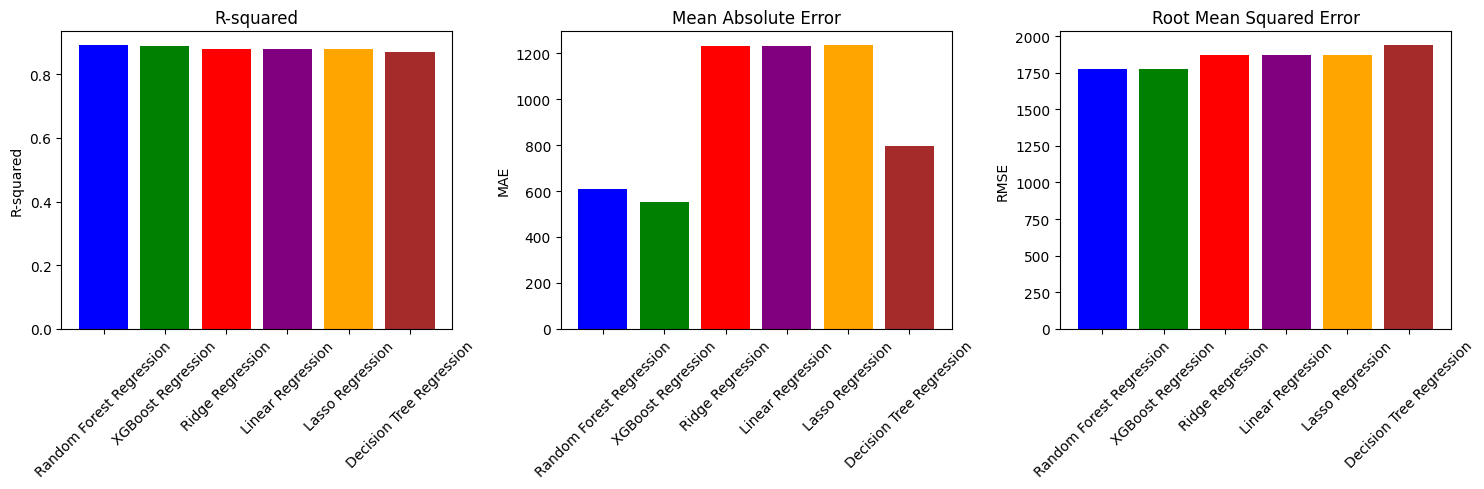

In [108]:
models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
          'Decision Tree Regression', 'Random Forest Regression', 'XGBoost Regression']
r2_scores = [r2_lr, r2_ridge, r2_lasso, r2_dt, r2_rf, r2_xgb]
mae_scores = [mae_lr, mae_ridge, mae_lasso, mae_dt, mae_rf, mae_xgb]
rmse_scores = [rmse_lr, rmse_ridge, rmse_lasso, rmse_dt, rmse_rf, rmse_xgb]

# Create a DataFrame for easier sorting
df_results = pd.DataFrame({'Model': models, 'R-squared': r2_scores, 'MAE': mae_scores, 'RMSE': rmse_scores})
df_results = df_results.sort_values(by='R-squared', ascending=False)

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Define colors for each model
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown']

# Plot R-squared
axes[0].bar(df_results['Model'], df_results['R-squared'], color=colors)
axes[0].set_ylabel('R-squared')
axes[0].set_title('R-squared')
axes[0].tick_params(axis='x', rotation=45)

# Plot MAE
axes[1].bar(df_results['Model'], df_results['MAE'], color=colors)
axes[1].set_ylabel('MAE')
axes[1].set_title('Mean Absolute Error')
axes[1].tick_params(axis='x', rotation=45)

# Plot RMSE
axes[2].bar(df_results['Model'], df_results['RMSE'], color=colors)
axes[2].set_ylabel('RMSE')
axes[2].set_title('Root Mean Squared Error')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

The plot visualizes the performance metrics of different regression models using three key evaluation metrics: R-squared, Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE). Here’s a breakdown of each subplot and what it indicates:

**1. R-squared Plot:**
- **Description**: R-squared, also known as the coefficient of determination, measures how well the regression model explains the variance of the dependent variable.
- **Interpretation**:
  - All models seem to have high R-squared values, close to or slightly above 0.8, indicating that they all explain a substantial amount of the variance in the target variable.
  - XGBoost Regression and Random Forest Regression appear to have the highest R-squared values, suggesting they fit the data slightly better than the other models.

**2. Mean Absolute Error (MAE) Plot:**
- **Description**: MAE measures the average magnitude of the errors in a set of predictions, without considering their direction. It’s the average over the test sample of the absolute differences between prediction and actual observation.
- **Interpretation**:
  - The XGBoost Regression model has the lowest MAE, indicating it makes more accurate predictions on average compared to the other models.
  - Decision Tree Regression also shows relatively low MAE, better than Ridge Regression, Linear Regression, and Lasso Regression, which have the highest MAE values. This suggests that XGBoost and Decision Tree Regression models produce predictions that are closer to the actual values.

**3. Root Mean Squared Error (RMSE) Plot:**
- **Description**: RMSE is a measure of the differences between predicted values and actual values, giving more weight to larger errors. It is the square root of the average of squared differences between prediction and actual observation.
- **Interpretation**:
  - XGBoost Regression and Random Forest Regression have the lowest RMSE values, indicating they are the best models in terms of prediction accuracy and penalizing larger errors.
  - The Decision Tree Regression model has the highest RMSE, which indicates that although it might produce predictions with a lower average error (as seen in the MAE plot), it still makes some predictions with large errors, leading to a higher RMSE.

***Summary***
- **Best Models**: XGBoost Regression and Random Forest Regression consistently perform well across all three metrics (high R-squared, low MAE, low RMSE), indicating they are the most accurate and reliable models for this dataset.
- **Other Models**: Ridge, Linear, and Lasso Regression show similar performance, with high MAE and RMSE values, suggesting less accuracy compared to XGBoost and Random Forest. Decision Tree Regression, despite having low MAE, has a high RMSE, suggesting it may have significant prediction errors in some cases.

These plots provide a comprehensive overview of how each regression model performs, helping to identify which models provide the most accurate and reliable predictions for the given data.

# Hyperparameter Tuning

In [109]:
! pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.8 MB/s eta 0:00:00


## Define the Objective Function

In [110]:
import optuna

def objective(trial):
    if trial.suggest_categorical('model', ['XGBoost', 'RandomForest', 'DecisionTree']):
      # XGBoost
      n_estimators = trial.suggest_int('n_estimators', 100, 1000)
      max_depth = trial.suggest_int('max_depth', 3, 10)
      learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3, log=True)
      subsample = trial.suggest_float('subsample', 0.5, 1.0)
      colsample_bytree = trial.suggest_float('colsample_bytree', 0.5, 1.0)

      model = XGBRegressor(
          n_estimators=n_estimators,
          max_depth=max_depth,
          learning_rate=learning_rate,
          subsample=subsample,
          colsample_bytree=colsample_bytree,
          random_state=0
      )

    elif trial.suggest_categorical('model', ['XGBoost', 'RandomForest', 'DecisionTree']):
      # Random Forest
      n_estimators = trial.suggest_int('n_estimators', 100, 1000)
      max_depth = trial.suggest_int('max_depth', 3, 10)
      min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
      min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 4)

      model = RandomForestRegressor(
          n_estimators=n_estimators,
          max_depth=max_depth,
          min_samples_split=min_samples_split,
          min_samples_leaf=min_samples_leaf,
          random_state=0
      )

    else:
      # Decision Tree
      max_depth = trial.suggest_int('max_depth', 3, 10)
      min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
      min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 4)

      model = DecisionTreeRegressor(
          max_depth=max_depth,
          min_samples_split=min_samples_split,
          min_samples_leaf=min_samples_leaf,
          random_state=0
      )

    # Create pipeline with preprocessor
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', model)])

    # Fit and evaluate
    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    #rmse = mean_squared_error(y_test, y_pred)

    return r2

## Optimizing the Hyperparameters

In [117]:
# Create Optuna study and optimize
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2024-09-02 02:38:11,257] A new study created in memory with name: no-name-67958f4c-6ed3-4b6b-a651-620bc00095e1
[I 2024-09-02 02:38:12,001] Trial 0 finished with value: 0.9106849781551252 and parameters: {'model': 'DecisionTree', 'n_estimators': 583, 'max_depth': 6, 'learning_rate': 0.2920093172701971, 'subsample': 0.9040503221004307, 'colsample_bytree': 0.7489759765346503}. Best is trial 0 with value: 0.9106849781551252.
[I 2024-09-02 02:38:12,479] Trial 1 finished with value: 0.9074155032113612 and parameters: {'model': 'DecisionTree', 'n_estimators': 861, 'max_depth': 4, 'learning_rate': 0.011798572459570505, 'subsample': 0.7325729147753153, 'colsample_bytree': 0.8779598262851194}. Best is trial 0 with value: 0.9106849781551252.
[I 2024-09-02 02:38:13,999] Trial 2 finished with value: 0.9246064037835932 and parameters: {'model': 'DecisionTree', 'n_estimators': 964, 'max_depth': 8, 'learning_rate': 0.05451334960180557, 'subsample': 0.9915549859852206, 'colsample_bytree': 0.56632715

## Best Model & Best Values

In [118]:
# Print best parameters and score
print('Best parameters:', study.best_params)
print('Best R-squared:', study.best_value)

Best parameters: {'model': 'XGBoost', 'n_estimators': 330, 'max_depth': 9, 'learning_rate': 0.03542163326130266, 'subsample': 0.9131026879750488, 'colsample_bytree': 0.6362894701394204}
Best R-squared: 0.9278362910084782


In [119]:
best_model_name = study.best_params.pop('model', None)

if best_model_name:
    if best_model_name == 'XGBoost':
        model = XGBRegressor(**{key: value for key, value in study.best_params.items() if key != 'model'}, random_state=0)
    elif best_model_name == 'RandomForest':
        model = RandomForestRegressor(**{key: value for key, value in study.best_params.items() if key != 'model'}, random_state=0)
    elif best_model_name == 'DecisionTree':
        model = DecisionTreeRegressor(**{key: value for key, value in study.best_params.items() if key != 'model'}, random_state=0)
    else:
        print(f"Unknown model name: {best_model_name}")
        model = None

    if model:
        pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('regressor', model)])
        pipeline.fit(X_train, y_train)

        print(f"Best model ({best_model_name}) fitted with parameters: {study.best_params}")
else:
  print("No best model found in the study results.")

Best model (XGBoost) fitted with parameters: {'model': 'XGBoost', 'n_estimators': 330, 'max_depth': 9, 'learning_rate': 0.03542163326130266, 'subsample': 0.9131026879750488, 'colsample_bytree': 0.6362894701394204}


In [120]:
y_pred_best = pipeline.predict(X_test)
r2_best = r2_score(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)
rmse_best = mean_squared_error(y_test, y_pred_best, squared=False)

print(f'MAE: {mae_best}')
print(f'RMSE: {rmse_best}')
print(f'R-squared: {r2_best}')

MAE: 776.9971492488938
RMSE: 1439.5217993199035
R-squared: 0.9278362910084782


## Saving the Best Model

In [130]:
import joblib

joblib.dump(pipeline, 'best_insurance_model.pkl')

['best_insurance_model.pkl']

# Feature Immportance from the Best Model

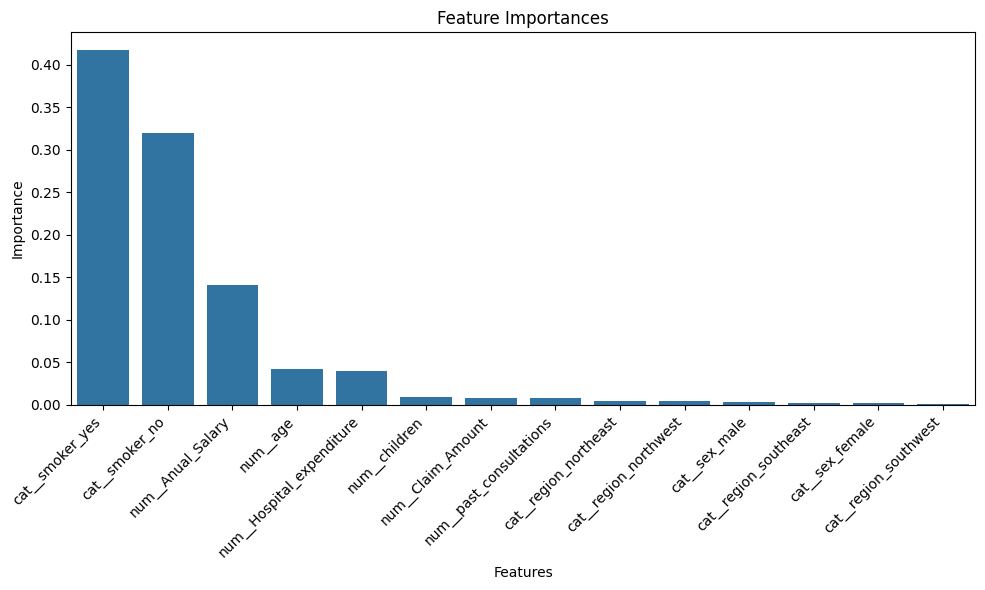

In [131]:
if best_model_name == 'XGBoost':
    importances = pipeline.named_steps['regressor'].feature_importances_

    feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

    df_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})
    df_importances = df_importances.sort_values(by='importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(y='importance', x='feature', data=df_importances)
    plt.title('Feature Importances')
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.tight_layout()
    plt.show()

This plot illustrates the importance of various features used in a machine learning model, a tree-based model like XGBoost. The feature importance values indicate how much each feature contributes to the predictions made by the model.

***Explanation of the Plot:***

1. **Y-axis (Importance):** This axis represents the importance score of each feature. The importance score is a measure of how much each feature contributes to the prediction. Higher values indicate more significant influence on the model's predictions.

2. **X-axis (Features):** The features listed along this axis represent the different variables used as input in the machine learning model. They are categorized as follows:
   - **Categorical Features:**
     - `cat__smoker_yes` and `cat__smoker_no`: These indicate whether the individual is a smoker or not, respectively.
     - `cat__region_*`: These features represent different regions, such as northeast, northwest, southeast, and southwest.
     - `cat__sex_male` and `cat__sex_female`: These features represent the gender of the individual.

   - **Numerical Features:**
     - `num__Annual_Salary`: Represents the annual salary of the individual.
     - `num__age`: Indicates the age of the individual.
     - `num__Hospital_expenditure`: This might represent the expenditure on hospital visits or treatments.
     - `num__children`: The number of children the individual has.
     - `num__Claim_Amount`: Represents the amount claimed.
     - `num__past_consultations`: The number of past consultations.

***Key Insights from the Plot***

1. **Smoking Status (`cat__smoker_yes` and `cat__smoker_no`):** These features have the highest importance scores, suggesting that whether an individual is a smoker or not is the most significant factor in predicting insurance charges. Smokers generally have higher health risks, which leads to higher insurance premiums.

2. **Annual Salary (`num__Annual_Salary`):** This feature is the second most important, indicating that the individual's income level plays a crucial role in determining the insurance charges. Higher salaries might correlate with higher charges or better plans.

3. **Age (`num__age`) and Hospital Expenditure (`num__Hospital_expenditure`):** These features also have noticeable importance. Age is often linked to health risks, which can influence insurance costs, while past hospital expenditure might indicate existing health issues.

4. **Less Important Features:** Variables such as the number of children, claim amount, and the specific region or sex of the individual show relatively low importance. This suggests that these factors do not significantly impact the prediction of insurance charges in the model.

***Summary***

The plot indicates that smoking status, annual salary, age, and hospital expenditure are the most influential factors in predicting insurance charges. This aligns with typical industry practices where lifestyle choices (like smoking), income, and health-related factors heavily influence insurance pricing. Understanding these feature importances can help insurance companies tailor their policies more effectively and target high-risk individuals with appropriate premiums.

# Model Interpretation with Shapley Values

In [122]:
! pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 13.2 MB/s eta 0:00:00


In [123]:
import shap
import xgboost

In [124]:
for col in ['sex', 'smoker', 'region']:
    if X_test[col].dtype == 'object':
        X_test[col] = X_test[col].astype('category')

In [125]:
X_test_encoded = pd.get_dummies(X_test, columns=['sex', 'smoker', 'region'])

In [126]:
explainer = shap.Explainer(pipeline.named_steps['regressor'])

In [127]:
shap_values = explainer(xgboost.DMatrix(X_test_encoded))

## Plotting the Values

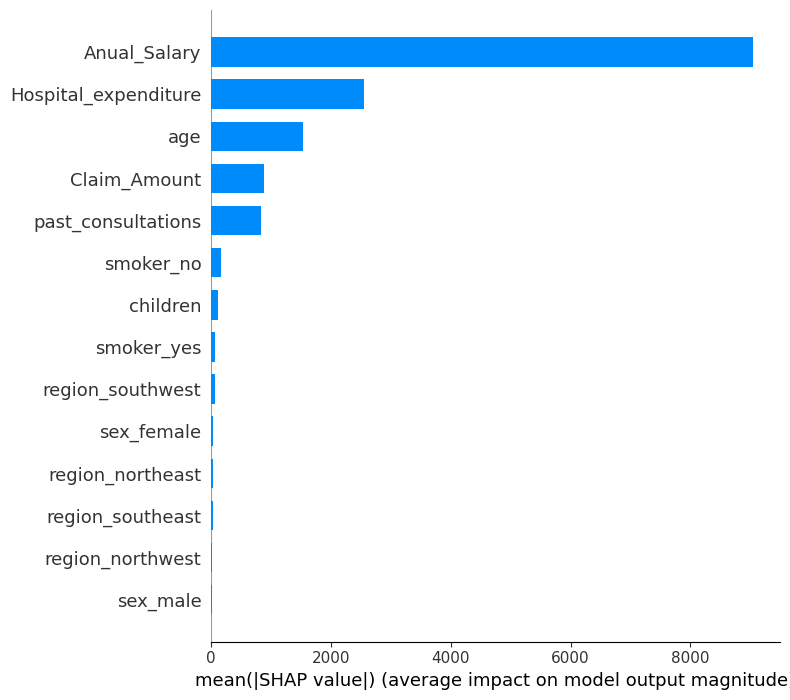

In [128]:
shap.summary_plot(shap_values, X_test_encoded, plot_type="bar")

The plot appears to be a SHAP (SHapley Additive exPlanations) summary plot, which shows the average impact of features on the model's output magnitude. SHAP values provide a way to explain the output of machine learning models by quantifying the contribution of each feature to the prediction. The x-axis represents the mean absolute SHAP value for each feature, which indicates how much, on average, each feature contributes to the model’s prediction.

***Key Observations from the Plot***

1. **`Anual_Salary`**:
   - This feature has the highest mean SHAP value, indicating it is the most influential in determining the model's predictions. The salary of an individual plays a significant role, possibly affecting their risk profile or insurance needs.

2. **`Hospital_expenditure`**:
   - The second most important feature is the amount spent on hospital care. This is a strong indicator of past health issues, which can predict future healthcare needs or risk levels.

3. **`age`**:
   - Age is also a significant factor, suggesting that it plays a notable role in the model’s predictions. This aligns with common knowledge that age is an important determinant in health-related models, as risk profiles change with age.

4. **`past_consultations`** and **`Claim_Amount`**:
   - These features have moderate impact. The number of past consultations might indicate the frequency of medical visits, which can be linked to overall health. Claim amount provides a historical perspective on the costs incurred by the insured, influencing future predictions.

5. **Less Influential Features**:
   - Features like `children`, `smoker_no`, and various regional indicators (e.g., `region_southwest`, `region_southeast`, etc.) have relatively low SHAP values, indicating they contribute less to the model's predictions.
   - Interestingly, `smoker_yes` and `smoker_no` have very low importance in this SHAP analysis, which contrasts with other typical health risk models. This could imply that, in this specific model, other factors are more predictive of the outcome.

6. **Minimal Impact Features**:
   - Variables like `sex_male`, `sex_female`, and `region_northwest` have almost negligible impact on the model's predictions. This suggests that gender and some regional factors do not significantly affect the outcome the model is predicting.

***Summary***

- **Main Influencers**: Annual salary and hospital expenditure are the dominant factors driving the model’s predictions, indicating that economic status and past healthcare costs are key predictors.
- **Age**: Age also plays a substantial role, highlighting its typical influence in risk assessments.
- **Moderate and Low Influences**: Past consultations and claim amounts have moderate influence, while other demographic details like the number of children, gender, and regional location play a minimal role.

This SHAP summary plot provides valuable insights into which features are most important for the model's decision-making process. By understanding these contributions, stakeholders can gain a better understanding of the model's behavior and potentially adjust it for fairness, accuracy, or other business objectives.

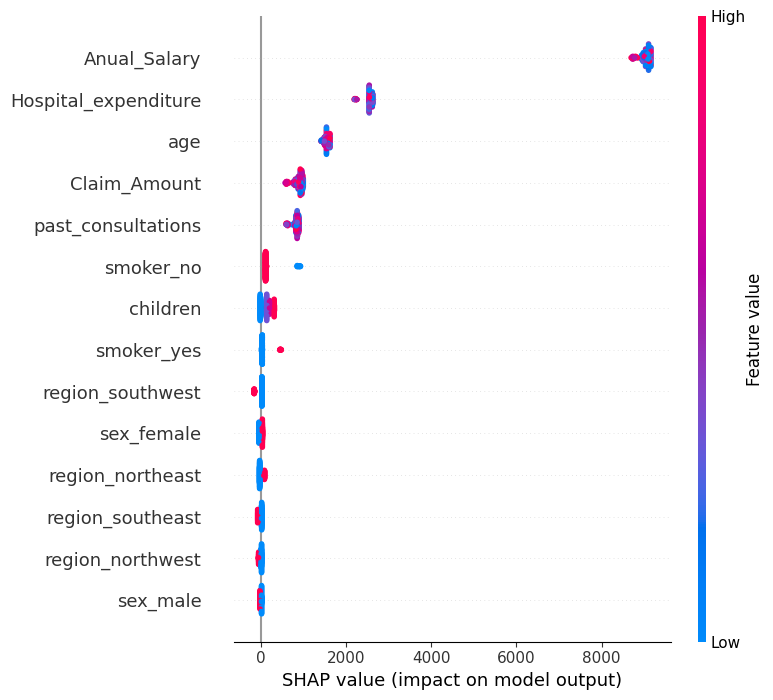

In [129]:
shap.summary_plot(shap_values, X_test_encoded)

This plot is a SHAP (SHapley Additive exPlanations) summary plot, which shows the impact of each feature on the model's output across the dataset. Each point on the plot represents a SHAP value for a particular feature of a specific instance in the dataset. This type of plot helps visualize how individual features influence the predictions of a machine learning model.

***Components of the Plot***

1. **Y-axis (Features)**: The features are listed on the Y-axis, ranked by their importance in the model from top to bottom. The most important features are at the top.
   
2. **X-axis (SHAP value)**: The X-axis represents the SHAP value, which indicates the impact of each feature on the model's prediction. Positive SHAP values indicate that the feature pushes the prediction higher, while negative SHAP values indicate it pushes the prediction lower.

3. **Color**: Each dot's color represents the feature value. Blue dots indicate low feature values, while red dots indicate high feature values. This color gradient provides additional insights into how the magnitude of the feature values affects the predictions.

***Interpretation of the Plot***

1. **`Anual_Salary`**:
   - This feature has the highest impact, as indicated by the wide range of SHAP values. Both high and low values of `Anual_Salary` significantly influence the model’s output, as shown by the spread of dots across the X-axis. Red (high salary) dots tend to have higher SHAP values, suggesting that higher salaries are associated with higher model predictions.

2. **`Hospital_expenditure`**:
   - Similar to `Anual_Salary`, this feature shows significant impact. Higher hospital expenditure (red dots) tends to push the model predictions higher. This makes sense, as higher historical spending might indicate higher risk or more severe health issues.

3. **`age`**:
   - The age feature has a moderate impact on the model’s predictions. Older ages (red dots) tend to have positive SHAP values, indicating that older individuals might contribute to higher risk or cost predictions.

4. **`past_consultations`** and **`Claim_Amount`**:
   - These features show some impact but to a lesser extent than the top features. More past consultations or higher claim amounts seem to have a moderate effect on increasing the model’s predictions.

5. **Less Influential Features**:
   - Features like `children`, `smoker_no`, `smoker_yes`, and various regional indicators (`region_southwest`, `region_southeast`, etc.) have relatively low SHAP values. This suggests that these factors have a smaller influence on the model's output.

6. **Effect of Feature Values**:
   - The spread of colors in each feature’s dots indicates how the feature values correlate with the SHAP values. For example, `Anual_Salary` has a distinct pattern where high values (red) are associated with high positive SHAP values, pushing the prediction up. On the other hand, features like `children` and `sex` do not show a strong correlation between feature value and SHAP value, indicating less influence.

***Summary***

- **High Impact Features**: `Anual_Salary`, `Hospital_expenditure`, and `age` are the most influential features, suggesting these are key factors the model uses to make predictions.
- **Moderate and Low Impact Features**: Features like `past_consultations` and `Claim_Amount` have some influence, while others like `children` and `region` categories have minimal impact.
- **Feature Value Relationship**: The color distribution shows how different ranges of feature values contribute to increasing or decreasing the predictions, offering insights into the model's behavior.

This SHAP summary plot helps to understand not just which features are important, but also how their values affect the model's output, providing interpretability to complex machine learning models.

# **Conclusion**

The successful implementation of a predictive model for insurance charges can significantly enhance the company's ability to price policies accurately, manage risks more effectively, and improve overall customer satisfaction. By leveraging machine learning, the insurance company can not only streamline its pricing strategy but also gain a competitive advantage in the market. The project demonstrates the value of data-driven decision-making in the insurance industry, emphasizing the importance of integrating advanced analytical techniques into traditional business processes.

This structured approach should provide a comprehensive view of the project, aligning technical work with business goals and outcomes. Let me know if you'd like to refine any part or need further details!

### Algorithms Used


In this project we have used Linear Regression, Decision Trees and Random Forest. We also added Regularization Techniques to check the performance of the models

## Final Model Algorithm

Among the models that we tried building, XGBoost Regression performed the best in terms of R Square, where approximately 92.4% of the variability in the insurance "charges" can be explained by the independent features.